In [94]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

import prepare
import evaluate
import acquire

In [5]:
# from sklearn.linear_model import LogisticRegression
#logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [8]:
titanic = acquire.get_titanic_data()

In [9]:
titanic = prepare.prep_titanic(titanic)
titanic = titanic.drop(columns=['sex', 'embark_town','age'])

In [10]:
train_validate, test = train_test_split(titanic,train_size=.8,random_state=123)
train, validate = train_test_split(titanic,train_size=.7,random_state=123,stratify=titanic.survived)

In [11]:
X_train = train.drop(columns=['survived'])
y_train = train['survived']

X_validate = validate.drop(columns=['survived'])
y_validate = validate['survived']

X_test = test.drop(columns=['survived'])
y_test = test['survived']

In [12]:
X_train.isna().sum()

pclass                     0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

# Model 1

In [13]:
seed = 42
logit = LogisticRegression(random_state=seed)

In [14]:
logit.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [15]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-6.64194292e-01 -3.96943799e-01 -1.70324541e-01  2.22247741e-03
  -8.07921608e-01 -2.53437904e+00 -8.41462394e-02 -2.82417218e-01]]
Intercept: 
 [3.4562969]


In [20]:
logit.classes_

array([0, 1])

In [21]:
logit.coef_

array([[-6.64194292e-01, -3.96943799e-01, -1.70324541e-01,
         2.22247741e-03, -8.07921608e-01, -2.53437904e+00,
        -8.41462394e-02, -2.82417218e-01]])

In [22]:
len(X_train.columns)

8

In [23]:
# The higher the coefficient
# The more important the feature

pd.DataFrame({'column':X_train.columns.tolist(),'coefficient':logit.coef_[0]})

,column,coefficient
0,pclass,-0.664194
1,sibsp,-0.396944
2,parch,-0.170325
3,fare,0.002222
4,alone,-0.807922
5,sex_male,-2.534379
6,embark_town_Queenstown,-0.084146
7,embark_town_Southampton,-0.282417


In [24]:
logit.intercept_

array([3.4562969])

In [16]:
y_pred = logit.predict(X_train)

In [17]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.80


In [18]:
print(confusion_matrix(y_train, y_pred))

[[330  54]
 [ 69 170]]


In [19]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       384
           1       0.76      0.71      0.73       239

    accuracy                           0.80       623
   macro avg       0.79      0.79      0.79       623
weighted avg       0.80      0.80      0.80       623



# Model 2

In [28]:
logit2 = LogisticRegression(penalty='l1',random_state=seed,solver='liblinear', max_iter=200)

In [29]:
logit2.fit(X_train,y_train)

LogisticRegression(max_iter=200, penalty='l1', random_state=42,
                   solver='liblinear')

In [30]:
logit2.coef_

array([[-0.62050132, -0.35615214, -0.14234378,  0.00304136, -0.68239236,
        -2.57827229,  0.        , -0.20114623]])

In [31]:
logit2.score(X_train,y_train)

0.8025682182985554

In [33]:
logit2.score(X_validate,y_validate)

0.7910447761194029

In [35]:
y_pred = logit2.predict(X_validate)

In [36]:
print(classification_report(y_validate,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       165
           1       0.77      0.65      0.71       103

    accuracy                           0.79       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268



In [39]:
probability_array = logit2.predict_proba(X_validate)

In [41]:
probability_array[0][1]

0.18449528297212328

In [42]:
for row in probability_array:
    print(row[1])

0.18449528297212328
0.8963234396678259
0.06059373691601723
0.10700175786722432
0.2088133505056284
0.613484290431388
0.30464614156614483
0.1069569542279657
0.9153185741539489
0.304815289236254
0.6631065772128084
0.8935106229095425
0.748774886824541
0.3862274655640594
0.6585251641263479
0.748774886824541
0.304815289236254
0.18449528297212328
0.12793391801142634
0.8584138554386439
0.15935955292363613
0.2171396022015515
0.10700175786722432
0.1525406585865393
0.8405801652587155
0.10688556985711163
0.12998366550030446
0.46161374898106095
0.14088777460578616
0.18449528297212328
0.7843600979504611
0.21454817208089602
0.5680179473494634
0.15388915518439844
0.8220197396688075
0.10696543717736595
0.3151251879118017
0.6586220674561107
0.662397325322416
0.748774886824541
0.1069569542279657
0.10696543717736595
0.9099481138610221
0.10889068734004781
0.10711319931486406
0.6153816145280624
0.9263305482713885
0.8405801652587155
0.49527401765626433
0.1719749198312733
0.9164705796489241
0.1719749198312733

In [43]:
probability_array_true = np.array([row[1] for row in probability_array])

In [44]:
probability_array_true[:5]

array([0.18449528, 0.89632344, 0.06059374, 0.10700176, 0.20881335])

In [45]:
import seaborn as sns

In [48]:
graph_df=pd.DataFrame({'proba_true':probability_array_true,'actual_label':y_validate})

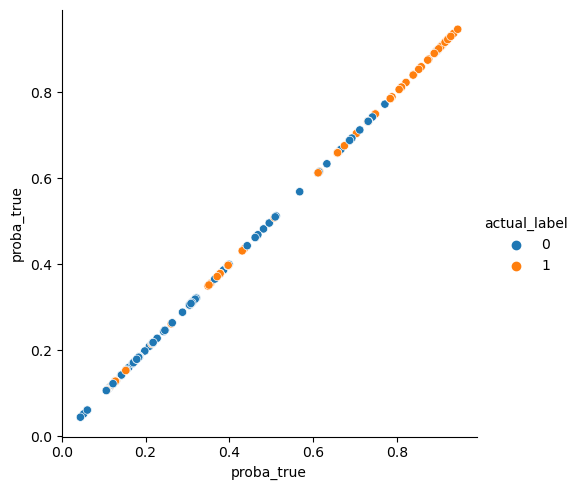

In [52]:
sns.relplot(data=graph_df, x='proba_true', y='proba_true',hue='actual_label')
plt.show()

# Evaluate

In [ ]:
# make predictions

y_pred1 = logit.predict(X_validate)
y_pred2 = logit2.predict(X_validate)


print("Model 1: solver = lbfgs, c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

# confusion matrix of model 1
print(confusion_matrix(y_validate, y_pred1))

# classification report of model 1
print(classification_report(y_validate, y_pred1))

print("Model 2: solver = lbfgs, c = .1")

# accuracy of model 2
print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))

# confusion matrix of model 2
print(confusion_matrix(y_validate, y_pred2))

# classification report of model 2
print(classification_report(y_validate, y_pred2))


# Exercises

#### In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

#### For all of the models you create, choose a threshold that optimizes for accuracy.
 
#### Create a new notebook, logistic_regression, use it to answer the following questions:

In [81]:
train_base = baseline = y_train.value_counts().idxmax()

In [82]:
df = pd.DataFrame(y_train)

In [83]:
df['baseline'] = train_base

In [84]:
df.head(3)

,survived,baseline
199,0,0
468,0,0
198,1,0


In [77]:
baseline_accuracy = (df.survived == df.baseline).mean()

In [78]:
baseline_accuracy

0.6163723916532905

### 1. Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

# Acquire Redo

In [177]:
baseline_accuracy

0.6163723916532905

In [117]:
titanic = acquire.get_titanic_data()

In [118]:
titanic = prepare.prep_titanic(titanic)
titanic = titanic.drop(columns=['sex', 'embark_town'])

In [119]:
titanic.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.25,0,1,0,1


In [120]:
train_validate, test = train_test_split(titanic,train_size=.8,random_state=123)
train, validate = train_test_split(titanic,train_size=.7,random_state=123,stratify=titanic.survived)

In [121]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
train[['age']] = imputer.fit_transform(train[['age']])
validate[['age']] = imputer.transform(validate[['age']])
test[['age']] = imputer.transform(test[['age']])

In [122]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
199,0,2,24.0,0,0,13.0,1,0,0,1


In [123]:
train.isna().sum()

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [124]:
X_train = train.drop(columns=['survived'])
y_train = train['survived']

X_validate = validate.drop(columns=['survived'])
y_validate = validate['survived']

X_test = test.drop(columns=['survived'])
y_test = test['survived']

In [126]:
X_train.isna().sum()

pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

# Model 1

### Acquire Model 1

In [178]:
baseline_accuracy

0.6163723916532905

In [127]:
X_train_model1 = X_train[['age','fare','pclass']]
X_validate_model1 = X_validate[['age','fare','pclass']]
X_test_model1 = X_test[['age','fare','pclass']]

In [128]:
seed = 42
logit_model_1 = LogisticRegression(random_state = seed)

In [129]:
logit_model_1.fit(X_train_model1,y_train)

LogisticRegression(random_state=42)

In [176]:
round(baseline_accuracy,2)

0.62

In [179]:
baseline_accuracy

0.6163723916532905

In [131]:
logit_model_1.score(X_train_model1,y_train)

0.6886035313001605

In [132]:
logit_model_1.score(X_validate_model1,y_validate)

0.7350746268656716

### 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

# Model 2

### Acquire Model 2

In [141]:
X_train_model2 = X_train[['age','fare','pclass','sex_male']]
X_validate_model2 = X_validate[['age','fare','pclass','sex_male']]
X_test_model2 = X_test[['age','fare','pclass','sex_male']]

In [142]:
seed = 42
logit_model_2 = LogisticRegression(random_state = seed)

In [143]:
logit_model_2.fit(X_train_model2,y_train)

LogisticRegression(random_state=42)

In [144]:
baseline_accuracy

0.6163723916532905

In [145]:
logit_model_2.score(X_train_model2,y_train)

0.8009630818619583

In [146]:
logit_model_2.score(X_validate_model2,y_validate)

0.7835820895522388

### 3. Try out other combinations of features and models.

In [155]:
compare = acquire.get_titanic_data()
compare = prepare.prep_titanic(compare)

In [157]:
compare.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embark_town', 'alone', 'sex_male', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

In [160]:
compare.shape

(891, 12)

In [162]:
train_validate_compare, test_compare = train_test_split(compare,train_size=.8,random_state=123,stratify=compare['survived'])
train_compare, validate_compare = train_test_split(train_validate_compare,train_size=.7,random_state=123,stratify=train_validate_compare['survived'])

In [168]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

train_compare[['age','embark_town']] = imputer.fit_transform(train_compare[['age','embark_town']])
validate_compare[['age','embark_town']] = imputer.transform(validate_compare[['age','embark_town']])
test_compare[['age','embark_town']] = imputer.transform(test_compare[['age','embark_town']])

# Isolate Target

In [169]:
X_train_compare = train_compare.drop(columns=['survived'])
y_train_compare = train_compare['survived']

X_validate_compare = validate_compare.drop(columns=['survived'])
y_validate_compare = validate_compare['survived']

X_test_compare = test_compare.drop(columns=['survived'])
y_test_compare = test_compare['survived']

#### Compare Model 1

In [170]:
X_train_compare.head(1)

,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,male,36.0,0,0,40.125,Cherbourg,1,1,0,0


In [ ]:
compare_1_columns = ['','','']

In [ ]:
X_train_compare_1 = X_train[compare_1_columns]
X_validate_compare_1 = X_validate[compare_1_columns]
X_test_compare_1 = X_test[compare_1_columns]

In [ ]:
logit_compare_1 = LogisticRegression(random_state = seed)

#### Compare Model 2

In [ ]:
X_train_compare.head(1)

In [ ]:
compare_2_columns = ['','','']

In [ ]:
X_train_compare_2 = X_train[compare_2_columns]
X_validate_compare_2 = X_validate[compare_2_columns]
X_test_compare_2 = X_test[compare_2_columns]

In [ ]:
logit_compare_2 = LogisticRegression(random_state = seed)

#### Compare Model 3

In [ ]:
X_train_compare.head(1)

In [ ]:
compare_3_columns = ['','','']

In [ ]:
X_train_compare_3 = X_train[compare_3_columns]
X_validate_compare_3 = X_validate[compare_3_columns]
X_test_compare_3 = X_test[compare_3_columns]

In [ ]:
logit_compare_3 = LogisticRegression(random_state = seed)

### 4. Use you best 3 models to predict and evaluate on your validate sample.

In [175]:
for i in range(1,4):
    print(f"Model {i} Train Acccuracy: {logit.score(X_train_best, y_train_best)}")
    print(f"Model {i} Validate Acccuracy: {logit.score(X_validate_best, y_validate_best)}")

NameError: name 'X_train_best' is not defined

In [ ]:
# LOOP

In [ ]:
logit.score(X_train_best, y_train_best)

In [ ]:
logit.score(X_validate_best, y_validate_best)

### 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

# Validate

In [ ]:
compare_best_columns = ['','','']

In [ ]:
X_train_best = X_train[compare_best_columns]
X_validate_best = X_validate[compare_best_columns]
X_test_best = X_test[compare_best_columns]

In [ ]:
best_model = LogisticRegression(random_state = seed)

In [ ]:
logit.score(X_train_best, y_train_best)

In [ ]:
logit.score(X_validate_best, y_validate_best)

In [ ]:
logit.score(X_test_best, y_test_best)

<hr style="border:2px solid gray">

### 6. Bonus1 How do different strategies for handling the missing values in the age column affect model performance?

### Model Comparison: Imputer Strategy

In [171]:
impute_strategy_list = ['mean','median','most_frequent', 'constant']

In [172]:
impute_strategy = impute_strategy_list[2]

In [173]:
imputer = SimpleImputer(missing_values = np.nan, strategy=impute_strategy)

In [ ]:
train[['age']] = imputer.fit_transform(train[['age']])
validate[['age']] = imputer.transform(validate[['age']])
test[['age']] = imputer.transform(test[['age']])

### 7. Bonus2: How do different strategies for encoding sex affect model performance?

In [ ]:
data_frame_compare = ''

In [ ]:
train[['age']] = imputer.fit_transform(train[['age']])
validate[['age']] = imputer.transform(validate[['age']])
test[['age']] = imputer.transform(test[['age']])

### 8. Bonus3: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.
###     Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected. C=.01,.1,1,10,100,1000

### 9. Bonus Bonus: how does scaling the data interact with your choice of C?